In [3]:
#beginning stages of project. exploratory work

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Intro 
* basic exploration 
*  

In [5]:
stats = pd.read_csv('stats.csv')

In [6]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14573 entries, 0 to 14572
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      14573 non-null  int64  
 1   Player  14573 non-null  object 
 2   Pos     14573 non-null  object 
 3   Age     14573 non-null  int64  
 4   Tm      14573 non-null  object 
 5   G       14573 non-null  int64  
 6   GS      14573 non-null  int64  
 7   MP      14573 non-null  float64
 8   FG      14573 non-null  float64
 9   FGA     14573 non-null  float64
 10  FG%     14485 non-null  float64
 11  3P      14573 non-null  float64
 12  3PA     14573 non-null  float64
 13  3P%     12375 non-null  float64
 14  2P      14573 non-null  float64
 15  2PA     14573 non-null  float64
 16  2P%     14419 non-null  float64
 17  eFG%    14485 non-null  float64
 18  FT      14573 non-null  float64
 19  FTA     14573 non-null  float64
 20  FT%     13824 non-null  float64
 21  ORB     14573 non-null  float64
 22

In [7]:
stats.describe().T

,count,mean,std,min,25%,50%,75%,max
Rk,14573.0,244.332876,139.596859,1.0,124.000,243.000,361.000,605.0
Age,14573.0,26.705483,4.252495,18.0,23.000,26.000,30.000,44.0
G,14573.0,45.544500,26.110389,1.0,22.000,48.000,70.000,85.0
GS,14573.0,21.565429,27.035594,0.0,0.000,7.000,39.000,83.0
MP,14573.0,19.623626,9.957188,0.0,11.400,18.900,27.700,43.7
FG,14573.0,2.932046,2.133970,0.0,1.300,2.400,4.100,12.2
FGA,14573.0,6.598586,4.541544,0.0,3.100,5.500,9.200,27.8
FG%,14485.0,0.432377,0.104592,0.0,0.393,0.435,0.479,1.0
3P,14573.0,0.590894,0.698191,0.0,0.000,0.300,1.000,5.3
3PA,14573.0,1.703637,1.840081,0.0,0.100,1.100,2.800,13.2


# Initial exploratory ideas/questions 
* what stats can be added into the dataframe
    * TS% -> `pts / 2(FGA + (.44 X FTA))`
    * tFGA (total field goal attempts) -> `stats['tFGA'] = round(stats['FGA'] * stats['G'], 0)`
    * tFTA
    * t3PA
    * t2PA
    * tTSA
* what categories can be added into the frame
    * starter -> whether or not a player starts more than 50% of games played 
    

In [8]:
league_average_stats_by_year = stats.groupby(by='Year').mean()

* figure out what the lockout years were
    * 1998-1999, 2011-2012
* figure out what percentage of available games the players played in
    * 98-99 (50 games), 11-12 (66) games
* scale that percentage of games to an 82 game season

In [9]:
print(82 / 50)
print(82 / 66) 

1.64
1.2424242424242424


In [10]:
stats['G'] = np.where(
    stats['Year'] == '1998-1999', round(stats['G'] * (82/50), 0), stats['G']
    )

stats['GS'] = np.where(
    stats['Year'] == '1998-1999', round(stats['GS'] * (82/50), 0), stats['GS']
    )

stats['G'] = np.where(
    stats['Year'] == '2011-2012', round(stats['G'] * (82/66), 0), stats['G']
    )

stats['GS'] = np.where(
    stats['Year'] == '2011-2012', round(stats['GS'] * (82/66), 0), stats['GS']
    )


In [11]:
stats[stats['Year'] == '2019-2020']['G'].max()

74.0

In [12]:
stats['TS%'] = stats['PTS'] / (2 * (stats['FGA'] + (.44 * stats['FTA'])))

In [13]:
stats['tFGA'] = round(stats['FGA'] * stats['G'], 0)

In [14]:
stats['tFTA'] = round(stats['FTA'] * stats['G'], 0)

In [15]:
stats['t3PA'] = round(stats['3PA'] * stats['G'], 0)

In [16]:
stats['t2PA'] = round(stats['2PA'] * stats['G'], 0)

In [17]:
stats['tTSA'] = stats['tFGA'] + stats['tFTA']

In [18]:
stats['Starter'] = np.where(stats['GS'] / stats['G'] > .50, 'Yes', 'No')

In [20]:
stats['GS']/ stats['G'] < 50 

0        True
1        True
2        True
3        True
4        True
         ... 
14568    True
14569    True
14570    True
14571    True
14572    True
Length: 14573, dtype: bool

In [43]:
stats['Pos'].value_counts()

PF       2999
SG       2962
PG       2895
C        2845
SF       2650
SF-SG      33
SG-SF      30
C-PF       29
PG-SG      28
SG-PG      27
PF-SF      25
PF-C       23
SF-PF      21
SG-PF       4
PG-SF       1
SF-C        1
Name: Pos, dtype: int64

In [46]:
stats[stats['Player'] == 'Vince Carter']w

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,PF,PTS,Year,TS%,tFGA,tFTA,t3PA,t2PA,tTSA,Starter
605,63,Vince Carter,SF,22,TOR,82.0,80.0,35.2,6.9,15.3,...,2.8,18.3,1998-1999,0.517651,1255.0,443.0,107.0,1148.0,1698.0,Yes
1110,70,Vince Carter,SF,23,TOR,82.0,82.0,38.1,9.6,20.7,...,3.2,25.7,1999-2000,0.543386,1697.0,549.0,238.0,1460.0,2246.0,Yes
1588,65,Vince Carter,SF,24,TOR,75.0,75.0,39.7,10.2,22.1,...,2.7,27.6,2000-2001,0.550942,1658.0,502.0,398.0,1260.0,2160.0,Yes
2129,76,Vince Carter,SG,25,TOR,60.0,60.0,39.8,9.3,21.8,...,3.2,24.7,2001-2002,0.513642,1308.0,306.0,312.0,996.0,1614.0,Yes
2613,68,Vince Carter,SG,26,TOR,43.0,42.0,34.2,8.3,17.7,...,2.8,20.6,2002-2003,0.532906,761.0,159.0,129.0,628.0,920.0,Yes
3110,74,Vince Carter,SG,27,TOR,73.0,73.0,38.2,8.3,20.0,...,2.9,22.5,2003-2004,0.499822,1460.0,416.0,241.0,1212.0,1876.0,Yes
3684,75,Vince Carter,SF-SG,28,TOT,77.0,76.0,36.7,9.0,20.0,...,3.2,24.5,2004-2005,0.541078,1540.0,462.0,316.0,1224.0,2002.0,Yes
3685,75,Vince Carter,SG,28,TOR,20.0,20.0,30.4,6.2,15.1,...,2.8,15.9,2004-2005,0.476504,302.0,72.0,60.0,244.0,374.0,Yes
3686,75,Vince Carter,SF,28,NJN,57.0,56.0,38.9,10.0,21.7,...,3.3,27.5,2004-2005,0.556861,1237.0,388.0,256.0,986.0,1625.0,Yes
4255,75,Vince Carter,SG,29,NJN,79.0,79.0,36.8,8.3,19.2,...,3.0,24.2,2005-2006,0.536728,1517.0,600.0,363.0,1153.0,2117.0,Yes


In [45]:
stats[stats['Pos'].str.contains('SF-SG')]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,PF,PTS,Year,TS%,tFGA,tFTA,t3PA,t2PA,tTSA,Starter
762,194,Eddie Jones,SF-SG,27,TOT,82.0,82.0,37.6,5.2,11.9,...,2.6,15.6,1998-1999,0.546372,976.0,443.0,230.0,746.0,1419.0,Yes
1106,68,Chris Carr,SF-SG,25,TOT,57.0,2.0,20.5,3.4,8.7,...,2.0,9.3,1999-2000,0.480968,496.0,125.0,103.0,393.0,621.0,No
1868,288,Tyrone Nesby,SF-SG,25,TOT,62.0,34.0,25.1,3.0,8.5,...,2.5,8.3,2000-2001,0.448746,527.0,105.0,180.0,347.0,632.0,Yes
3144,104,Ricky Davis,SF-SG,24,TOT,79.0,27.0,31.3,5.6,12.0,...,2.2,14.4,2003-2004,0.531758,948.0,276.0,142.0,814.0,1224.0,No
3198,150,Gordan Giriček,SF-SG,26,TOT,73.0,43.0,28.0,4.3,9.9,...,2.0,11.3,2003-2004,0.519875,723.0,161.0,153.0,569.0,884.0,Yes
3269,207,Chris Jefferies,SF-SG,23,TOT,21.0,2.0,9.3,1.3,3.4,...,1.7,4.0,2003-2004,0.520833,71.0,21.0,42.0,29.0,92.0,No
3605,10,Shandon Anderson,SF-SG,31,TOT,66.0,5.0,17.7,1.5,3.3,...,2.1,3.9,2004-2005,0.521390,218.0,66.0,26.0,185.0,284.0,No
3684,75,Vince Carter,SF-SG,28,TOT,77.0,76.0,36.7,9.0,20.0,...,3.2,24.5,2004-2005,0.541078,1540.0,462.0,316.0,1224.0,2002.0,Yes
4546,320,Ruben Patterson,SF-SG,30,TOT,71.0,22.0,25.2,4.6,8.9,...,2.1,12.1,2005-2006,0.549401,632.0,341.0,14.0,625.0,973.0,No
4589,355,Jalen Rose,SF-SG,33,TOT,72.0,45.0,27.5,4.0,9.5,...,2.2,12.3,2005-2006,0.537775,684.0,317.0,173.0,511.0,1001.0,Yes


## Create Subsets

In [21]:
mask = stats['Pos'].str.contains(r'[CF]', regex=True)
frontcourt =  stats[mask]

mask = stats['Pos'].str.contains(r'[G]', regex=True)
backcourt = stats[mask]

In [22]:
mask = stats['Starter'] == "Yes"
starters = stats[mask]

In [23]:
starters

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,PF,PTS,Year,TS%,tFGA,tFTA,t3PA,t2PA,tTSA,Starter
2,3,Shareef Abdur-Rahim,SF,21,VAN,82.0,82.0,36.0,8.0,16.4,...,2.5,22.3,1997-1998,0.562223,1345.0,640.0,49.0,1296.0,1985.0,Yes
5,4,Cory Alexander,PG,24,DEN,23.0,19.0,34.7,4.8,11.1,...,2.0,14.0,1997-1998,0.567629,255.0,64.0,113.0,143.0,319.0,Yes
6,5,Ray Allen*,SG,22,MIL,82.0,82.0,40.1,6.9,16.0,...,3.0,19.5,1997-1998,0.538317,1312.0,394.0,369.0,943.0,1706.0,Yes
9,8,Kenny Anderson,PG,27,TOT,61.0,56.0,30.5,4.4,11.0,...,2.2,12.2,1997-1998,0.491618,671.0,195.0,159.0,512.0,866.0,Yes
10,8,Kenny Anderson,PG,27,POR,45.0,40.0,32.7,4.5,11.7,...,2.2,12.6,1997-1998,0.480623,526.0,144.0,135.0,396.0,670.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14550,589,Robert Williams,C,24,BOS,61.0,61.0,29.6,4.4,6.0,...,2.2,10.0,2021-2022,0.750751,366.0,92.0,0.0,366.0,458.0,Yes
14556,593,Justise Winslow,SF,25,POR,11.0,10.0,26.8,4.3,10.5,...,1.9,10.7,2021-2022,0.464732,116.0,25.0,37.0,79.0,141.0,Yes
14558,595,Christian Wood,C,26,HOU,68.0,67.0,30.8,6.5,12.9,...,2.5,17.9,2021-2022,0.594447,877.0,333.0,333.0,544.0,1210.0,Yes
14569,602,Trae Young,PG,23,ATL,76.0,76.0,34.9,9.4,20.3,...,1.7,28.4,2021-2022,0.603947,1543.0,555.0,608.0,935.0,2098.0,Yes


## Explore Shooting
* Min 500+ tTSA (true shooting attempts)
* Min 100+ FT (free throw attempts)
* Min 55+ 3p (3 point attempts)
* Explore by:
    * Position (Frontcourt/Backcourt)
    * 
 

In [24]:
true_shooting = stats[stats['tTSA'] > 500]\
                    .sort_values(by=['TS%'],ascending=False)


In [25]:
tsa_by_year = true_shooting.groupby(by='Year').mean()['TS%']

In [49]:
tsa_by_year.sort_values(ascending=False)

Year
2020-2021    0.577682
2021-2022    0.570309
2019-2020    0.567635
2018-2019    0.561576
2017-2018    0.557922
2016-2017    0.553291
2008-2009    0.549134
2006-2007    0.545078
2010-2011    0.544749
2009-2010    0.544455
2013-2014    0.542872
2007-2008    0.542529
2015-2016    0.541413
2005-2006    0.539587
2012-2013    0.537962
2014-2015    0.537320
2011-2012    0.532369
2004-2005    0.532129
1997-1998    0.526003
2002-2003    0.525032
2001-2002    0.524454
1999-2000    0.523334
2003-2004    0.521361
2000-2001    0.520977
1998-1999    0.516541
Name: TS%, dtype: float64

In [27]:
5*(1.1)

5.5

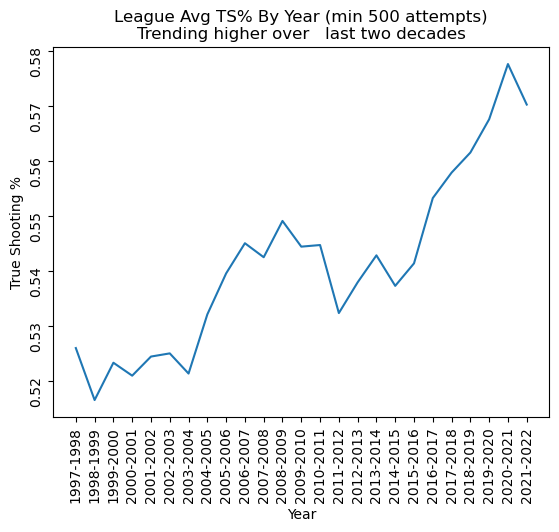

In [28]:
fig, ax = plt.subplots()
ax.plot(tsa_by_year)
ax.set_title('League Avg TS% By Year (min 500 attempts)\nTrending higher over   last two decades')
ax.set_ylabel('True Shooting %')
ax.set_xlabel('Year')
ax.tick_params(rotation=90)



In [29]:
true_shooting.sort_values(by='Year')

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,PF,PTS,Year,TS%,tFGA,tFTA,t3PA,t2PA,tTSA,Starter
411,355,Brian Shaw,PG,31,TOT,59.0,34.0,25.9,2.6,7.6,...,2.5,6.3,1997-1998,0.393947,448.0,53.0,94.0,348.0,501.0,Yes
223,195,Eddie Johnson,SF,38,HOU,75.0,1.0,19.9,3.0,7.3,...,1.2,8.4,1997-1998,0.519031,548.0,135.0,195.0,345.0,683.0,No
296,262,Reggie Miller*,SG,32,IND,81.0,81.0,34.5,6.4,13.3,...,1.8,19.5,1997-1998,0.621970,1077.0,437.0,381.0,697.0,1514.0,Yes
79,67,Rex Chapman,SG,30,PHO,68.0,67.0,33.3,6.0,14.1,...,1.5,15.9,1997-1998,0.518523,959.0,190.0,313.0,646.0,1149.0,Yes
261,231,Sam Mack,SF,27,VAN,57.0,54.0,24.8,3.9,9.8,...,2.1,10.8,1997-1998,0.518433,559.0,80.0,268.0,291.0,639.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14264,373,Ben McLemore,SG,28,POR,64.0,6.0,20.1,3.4,8.4,...,1.6,10.2,2021-2022,0.565661,538.0,90.0,416.0,122.0,628.0,No
13772,3,Bam Adebayo,C,24,MIA,56.0,56.0,32.6,7.3,13.0,...,3.1,19.1,2021-2022,0.608901,728.0,342.0,6.0,722.0,1070.0,Yes
14121,270,Jaren Jackson Jr.,PF,22,MEM,78.0,78.0,27.3,5.5,13.3,...,3.5,16.3,2021-2022,0.534917,1037.0,343.0,398.0,632.0,1380.0,Yes
14536,577,Coby White,PG,21,CHI,61.0,17.0,27.5,4.6,10.6,...,2.2,12.7,2021-2022,0.563943,647.0,92.0,354.0,293.0,739.0,No


### Look at TS% by position (frontcourt/backcourt)
* 

In [30]:
import re 
p = re.compile('[FC]')

#tsa_frontcourt = true_shooting[true_shooting['Pos'].str.contains(['F','C'])]\
#                    .groupby(by='Year').mean()['TS%']

mask = true_shooting['Pos'].str.contains(r'[CF]', regex=True)
tsa_frontcourt =  true_shooting[mask]

mask = true_shooting['Pos'].str.contains(r'[G]', regex=True)
tsa_backcourt = true_shooting[mask]




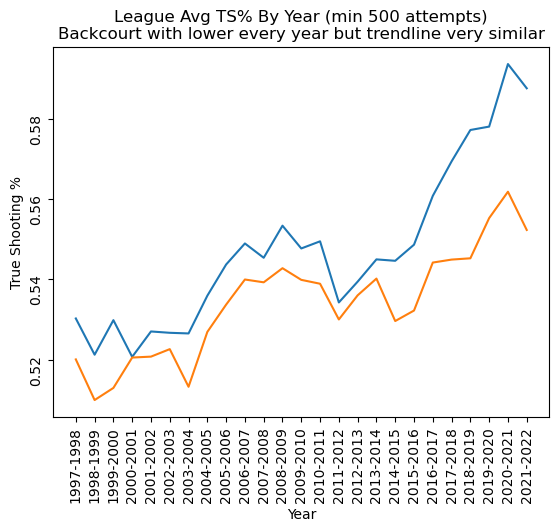

In [105]:
fig, ax = plt.subplots()
ax.plot(tsa_frontcourt.groupby(by='Year').mean()['TS%'])
ax.plot(tsa_backcourt.groupby(by='Year').mean()['TS%'])
ax.set_title(
    'League Avg TS% By Year (min 500 attempts)\nBackcourt with lower every year but trendline very similar'
    )
ax.set_ylabel('True Shooting %')
ax.set_xlabel('Year')
ax.tick_params(rotation=90)


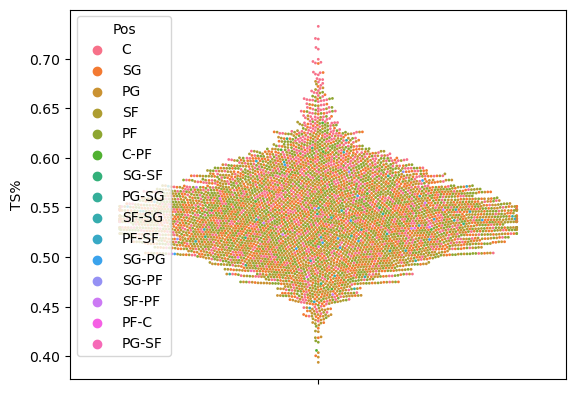

In [42]:
sns.swarmplot(
    data=true_shooting, y='TS%',
    size=2,hue='Pos')
plt.show()


## 3-Point Shooting

In [106]:
three_point_shooting = stats[stats['t3PA'] > 55]

In [107]:
three_point_shooting['t3PA'].describe()

count    6212.000000
mean      201.957341
std       120.976834
min        56.000000
25%       105.000000
50%       172.000000
75%       270.250000
max      1030.000000
Name: t3PA, dtype: float64

<AxesSubplot:xlabel='Year'>

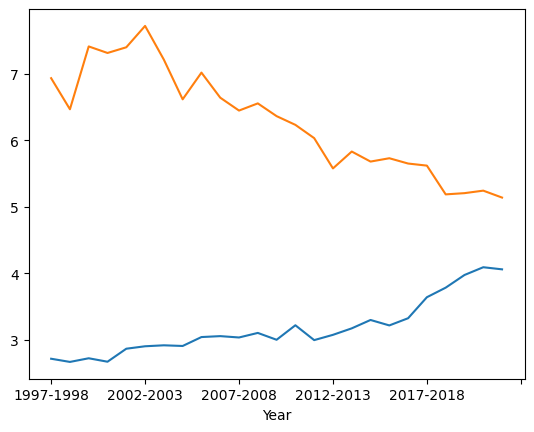

In [108]:
three_point_shooting.groupby(by='Year').mean()['3PA'].plot()
three_point_shooting.groupby(by='Year').mean()['2PA'].plot()

<AxesSubplot:xlabel='Year'>

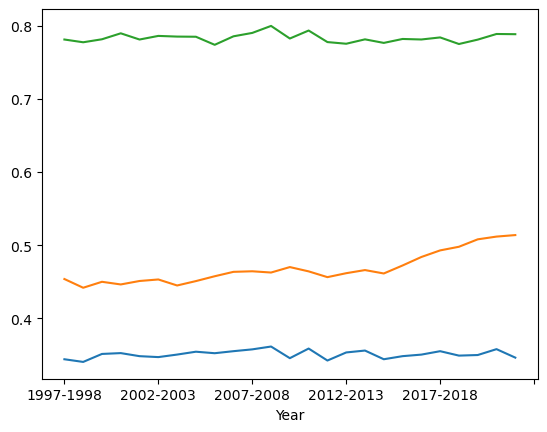

In [109]:
three_point_shooting.groupby(by='Year').mean()['3P%'].plot()
three_point_shooting.groupby(by='Year').mean()['2P%'].plot()
three_point_shooting.groupby(by='Year').mean()['FT%'].plot()

In [110]:
free_throw_shooting = stats[stats['tFTA'] > 125]

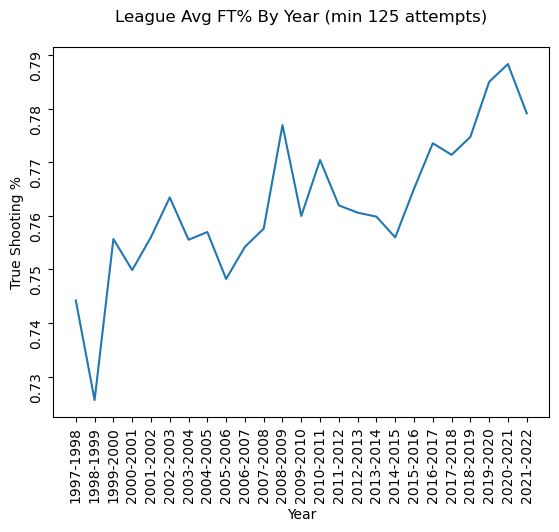

In [111]:
fig, ax = plt.subplots()
ax.plot(free_throw_shooting.groupby(by='Year').mean()['FT%'])
ax.set_title(
    'League Avg FT% By Year (min 125 attempts)\n'
    )
ax.set_ylabel('True Shooting %')
ax.set_xlabel('Year')
ax.tick_params(rotation=90)
plt.show()

<AxesSubplot:xlabel='Year'>

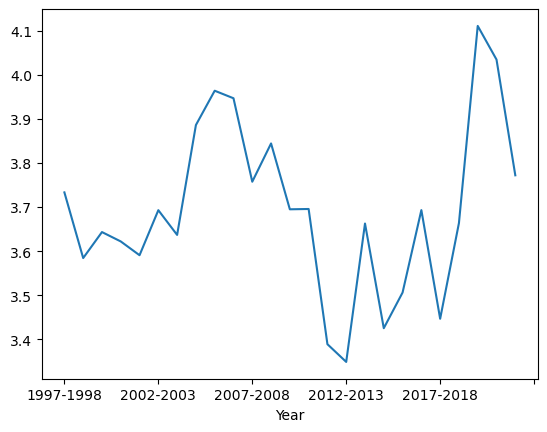

In [112]:
free_throw_shooting.groupby(by='Year').mean()['FTA'].plot()

## Takeaways from analyzing shooting numbers

# Explore Starters


In [117]:
starters['G'] / 82

2        1.000000
5        0.280488
6        1.000000
9        0.743902
10       0.548780
           ...   
14550    0.743902
14556    0.134146
14558    0.829268
14569    0.926829
14572    0.926829
Name: G, Length: 4819, dtype: float64

<AxesSubplot:xlabel='Year'>

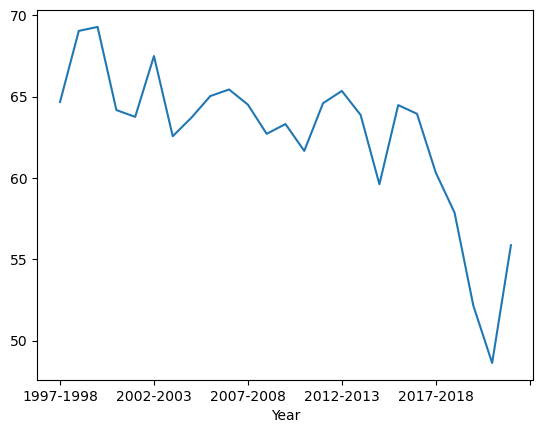

In [118]:
starters.groupby(by='Year').mean()['G'].plot()

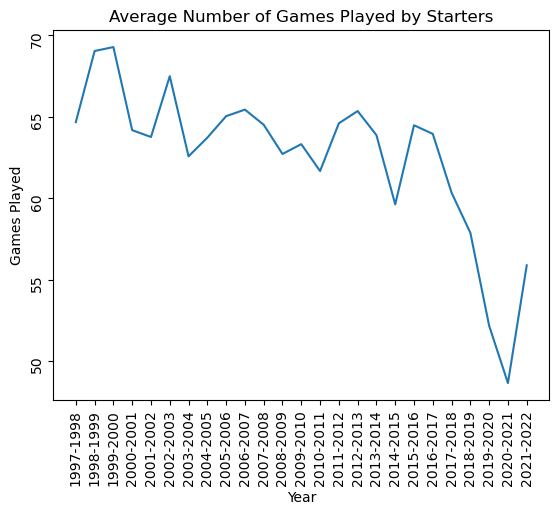

In [121]:
fig, ax = plt.subplots()
ax.plot(starters.groupby(by='Year').mean()['G'])

ax.set_title(
    'Average Number of Games Played by Starters'
    )
ax.set_ylabel('Games Played')
ax.set_xlabel('Year')
ax.tick_params(rotation=90)